In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf #deeplearning library

In [ ]:
(data_train, label_train), (data_test, label_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
data_train.shape, data_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
data=np.concatenate((data_train,data_test),axis=0)
label=np.concatenate((label_train,label_test),axis=0)
data.shape, label.shape

((70000, 28, 28), (70000,))

In [ ]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_output,test_output=train_test_split(data,label,test_size=0.2)

In [ ]:
train_input.shape, test_input.shape

((56000, 28, 28), (14000, 28, 28))

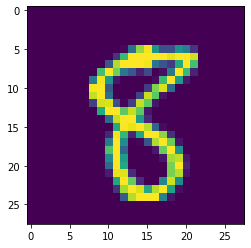

In [ ]:
plt.imshow(train_input[15])

In [ ]:
train_input[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
train_input_f=train_input.reshape(-1,28*28)
test_input_f=test_input.reshape(-1,28*28)

In [ ]:
train_input_f.shape

(56000, 784)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
Dnn=Sequential()
Dnn.add(Dense(200,activation="relu"))
Dnn.add(Dense(200,activation="relu"))
Dnn.add(Dropout(0.2))
Dnn.add(Dense(100,activation="relu"))
Dnn.add(Dense(10,activation="softmax")) #0~9
Dnn.compile(loss="sparse_categorical_crossentropy",metrics="accuracy",optimizer="adam")

In [ ]:
Dnn.fit(train_input_f,train_output,epochs=10,batch_size=1000)

Epoch 1/10
56/56 [==============================] - 2s 30ms/step - loss: 6.8218 - accuracy: 0.7069
Epoch 2/10
56/56 [==============================] - 2s 30ms/step - loss: 0.9349 - accuracy: 0.8586
Epoch 3/10
56/56 [==============================] - 2s 30ms/step - loss: 0.5737 - accuracy: 0.8871
Epoch 4/10
56/56 [==============================] - 2s 30ms/step - loss: 0.4130 - accuracy: 0.9074
Epoch 5/10
56/56 [==============================] - 2s 30ms/step - loss: 0.3256 - accuracy: 0.9206
Epoch 6/10
56/56 [==============================] - 2s 30ms/step - loss: 0.2668 - accuracy: 0.9306
Epoch 7/10
56/56 [==============================] - 2s 30ms/step - loss: 0.2264 - accuracy: 0.9396
Epoch 8/10
56/56 [==============================] - 2s 29ms/step - loss: 0.1907 - accuracy: 0.9470
Epoch 9/10
56/56 [==============================] - 2s 29ms/step - loss: 0.1690 - accuracy: 0.9519
Epoch 10/10
56/56 [==============================] - 2s 30ms/step - loss: 0.1481 - accuracy: 0.9566


In [ ]:
Dnn.evaluate(test_input_f,test_output)

438/438 [==============================] - 1s 2ms/step - loss: 0.2315 - accuracy: 0.9494


[0.23153506219387054, 0.9493571519851685]

In [ ]:
import cv2
test_image=cv2.imread("/content/2.jpg",cv2.IMREAD_GRAYSCALE)

In [ ]:
test_image

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

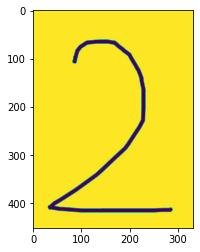

In [ ]:
plt.imshow(test_image)

In [ ]:
test_image_BW=255-test_image
test_image_BW

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

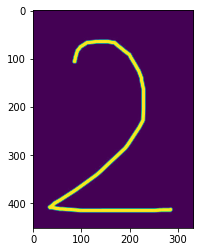

In [ ]:
plt.imshow(test_image_BW)

In [ ]:
test_image_BW_re=cv2.resize(test_image_BW,(28,28))
test_image_BW_re

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2, 249,   0,   0,   0,   0,
          0, 252,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 254,   0,   0,   0,   0,   0,
          0,   0,   2, 251,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

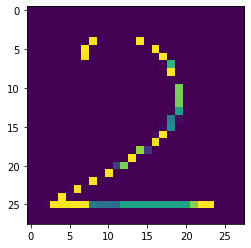

In [ ]:
plt.imshow(test_image_BW_re)

In [ ]:
test_image_BW_re.shape

(28, 28)

In [ ]:
test_image_f=test_image_BW_re.reshape(-1,28*28)

In [ ]:
Dnn.predict([[test_image_f]])

array([[1.55463573e-02, 4.59163071e-04, 6.34817541e-01, 4.41718027e-02,
        1.13473476e-07, 2.56220073e-01, 7.82349730e-07, 4.87130173e-02,
        1.56472488e-05, 5.55478946e-05]], dtype=float32)

In [ ]:
np.argmax(Dnn.predict([[test_image_f]]))

2